# Analyzing predictions

In [73]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [74]:
true_labels = pd.read_csv("../label_processing/slim_metadata.csv",
                 sep=",",
                 index_col=0)
N = len(true_labels.index)
print(f"N = {N}")
true_labels.head(10)

N = 744311


,composer
ID,
5925434,K. Totaka
3587506,Brandon
5595487,B. Shi
78586,B. Springsteen
2279696,G. F. Handel
5838018,D. Wilson
274021,E. Iseli
5960059,R. J. Williams
5954683,O. Und; J. L. Bell


In [75]:
trunc_labels=true_labels['composer'].str.split(';').str[0]
trunc_labels.head(10)

ID
5925434         K. Totaka
3587506           Brandon
5595487            B. Shi
78586      B. Springsteen
2279696      G. F. Handel
5838018         D. Wilson
274021           E. Iseli
5960059    R. J. Williams
5954683            O. Und
5046674             Vivid
Name: composer, dtype: object

In [76]:
top_composers=true_labels['composer'].value_counts()[:10]
trunc_labels=trunc_labels.apply(lambda x: x if x in top_composers else "other")

In [77]:
predicted_labels = pd.read_csv("./predictions.tsv",
                 sep="\t",
                 escapechar='\\',
                 index_col=0)
N = len(predicted_labels.index)
print(f"N = {N}")
predicted_labels.set_index('ID', inplace=True)
predicted_labels.head(10)

N = 8146


,predicted_composer
ID,
362386,J. S. Bach
6196263,T. Fox
5026412,L. V. Beethoven
4887846,Y. Kato 加藤 洋平
5995484,J. S. Bach
5050524,J. S. Bach
946136,Y. Kato 加藤 洋平
4808777,J. S. Bach
1358326,Y. Kato 加藤 洋平


In [78]:
merge=pd.merge(trunc_labels,predicted_labels, left_on='ID', right_on='ID')
merge

,composer,predicted_composer
ID,,
131072,J. S. Bach,J. S. Bach
5322976,T. Fox,J. S. Bach
5073314,J. S. Bach,L. V. Beethoven
3391526,J. Williams,P. F. Carera
6177755,W. A. Mozart,W. A. Mozart
...,...,...
5846651,Y. Kato 加藤 洋平,Y. Kato 加藤 洋平
5188468,K. Kondo,Y. Kato 加藤 洋平
5897397,Y. Kato 加藤 洋平,Y. Kato 加藤 洋平


In [79]:
print("True top 10:\n", top_composers)
print("Predicted top 10 (or less):\n", predicted_labels['predicted_composer'].value_counts())

True top 10:
 J. S. Bach         9498
Y. Kato  加藤 洋平     5156
W. A. Mozart       4758
P. F. Carera       4438
T. Fox             4081
L. V. Beethoven    3994
J. Williams        3082
K. Kondo           3033
A. Vivaldi         1403
J. Hisaishi        1392
Name: composer, dtype: int64
Predicted top 10 (or less):
 J. S. Bach         3752
Y. Kato  加藤 洋平     1973
P. F. Carera        907
W. A. Mozart        763
L. V. Beethoven     343
A. Antão            274
T. Fox               76
J. Williams          58
Name: predicted_composer, dtype: int64


In [80]:
confusion_matrix = pd.crosstab(merge['composer'], merge['predicted_composer'], rownames=['Actual'], colnames=['Predicted'])

In [81]:
print(confusion_matrix)

Predicted        A. Antão  J. S. Bach  J. Williams  L. V. Beethoven  \
Actual                                                                
A. Vivaldi             10         107            1               15   
J. S. Bach             29        1101           11               57   
J. Williams            10         321           10               25   
K. Kondo               12         338            6               32   
L. V. Beethoven        48         306            3              132   
P. F. Carera            0         190            7                1   
T. Fox                  7         402            7               21   
W. A. Mozart           26         503            9               37   
Y. Kato  加藤 洋平          0         327            0                0   
other                 132         156            4               23   

Predicted        P. F. Carera  T. Fox  W. A. Mozart  Y. Kato  加藤 洋平  
Actual                                                               
A. Viva

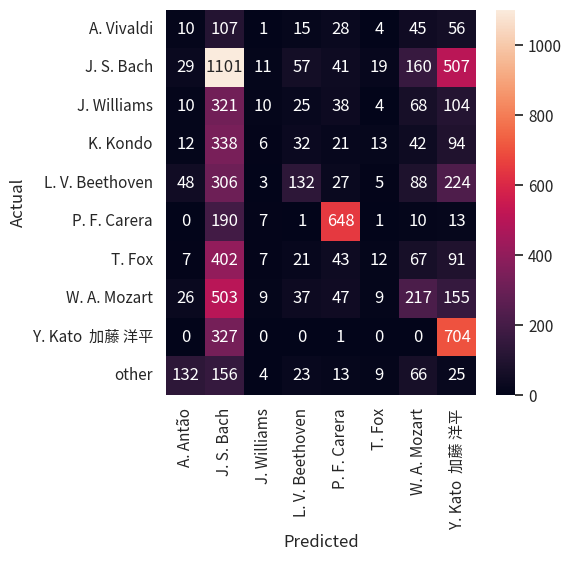

In [82]:
fig, ax=plt.subplots(figsize=(5,5))
sn.set(font='Noto Sans TC')
sn.heatmap(confusion_matrix, annot=True, ax=ax, fmt='g')
plt.show()

# Tests

In [43]:
true_labels.loc[merge[merge['composer']=="other"].index.values]

,composer
ID,
5600434,K. Mcnamara; K. Kondo
5853835,A. Antão
6035308,A. Antão
6384933,D. De; A. Antão
6029626,J. Sebastian; J. S. Bach
...,...
6393628,A. Antão
6270589,D. De; A. Antão
6090752,A. Antão


In [44]:
merge[merge['composer']=='other']

,composer,predicted_composer
ID,,
5600434,other,J. S. Bach
5853835,other,A. Antão
6035308,other,W. A. Mozart
6384933,other,T. Fox
6029626,other,Y. Kato 加藤 洋平
...,...,...
6393628,other,J. S. Bach
6270589,other,A. Antão
6090752,other,A. Antão


In [85]:
predicted_labels.value_counts()*100/len(predicted_labels)

predicted_composer
J. S. Bach            46.059416
Y. Kato  加藤 洋平        24.220476
P. F. Carera          11.134299
W. A. Mozart           9.366560
L. V. Beethoven        4.210656
A. Antão               3.363614
T. Fox                 0.932973
J. Williams            0.712006
dtype: float64

In [ ]:
10%